In [11]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [51]:
from src.data.sets import load_sets

X_train, y_train, X_val, y_val, X_test, y_test = load_sets()

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(911287, 10)
(911287,)
(303761, 10)
(303761,)
(303761, 10)
(303761,)


In [52]:
X_train

array([[ 1.30792076e+00,  4.88600000e+03,  1.25242800e-01, ...,
        -3.16196567e+00, -8.79383145e-01,  1.22054450e+00],
       [ 1.30792076e+00,  4.88600000e+03,  1.39712080e-01, ...,
        -1.10341196e+00, -3.62705785e-01,  1.23096726e+00],
       [ 1.30792076e+00,  4.88600000e+03,  1.39731952e-01, ...,
        -1.10341196e+00, -2.33536445e-01,  1.23105909e+00],
       ...,
       [-5.02714131e-01,  3.75000000e+02, -2.41507318e+00, ...,
        -4.17227385e-01, -6.21044465e-01, -8.94265671e-01],
       [-5.02714131e-01,  3.75000000e+02, -2.41545882e+00, ...,
        -1.10341196e+00, -6.21044465e-01, -8.94265671e-01],
       [-5.02714131e-01,  3.75000000e+02, -2.42214401e+00, ...,
        -1.10341196e+00, -6.21044465e-01, -8.94265671e-01]])

In [3]:
model = KElbowVisualizer(KMeans(), k=(2,15))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x40534b5410>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=14,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

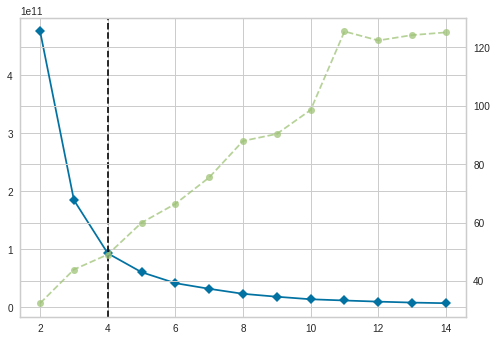

In [4]:
model.fit(X_train)

In [53]:
n_clusters = model.elbow_value_

In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
gmm = GaussianMixture(n_components=n_clusters, random_state=8)

In [8]:
gmm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [9]:
gmm.predict(X_train)

array([3, 3, 3, ..., 2, 2, 2])

In [38]:
obs = pd.DataFrame(X_train[0]).transpose()

In [42]:
gmm.predict(obs)

array([3])

### Build Pipeline

In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [47]:
cat_transformer = Pipeline(
    steps=[
        ('ordinal_encoder', OrdinalEncoder())
    ]
)

In [48]:
target_transformer = Pipeline(
    steps=[
        ('label_encoder', LabelEncoder())
    ]
)

In [49]:
from sklearn.compose import ColumnTransformer

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols),
        ('target_cols', target_transformer, target)
    ]
)

NameError: name 'num_cols' is not defined

In [ ]:
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

In [ ]:
gmm_pipe.fit(X_train)

In [ ]:
gmm_pipe.predict(X_train)

In [ ]:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

In [ ]:
from joblib import dump 

dump(gmm_pipe,  '../models/gmm_pipeline.joblib')